### Design a model using logistic regression to predict employee may retain or leave , 0 is retained , 1 is left

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()
#df.shape

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<h2 style="color:purple">Data exploration and visualization</h2>

In [10]:
left = df[df.left==1]
left.shape

(3571, 10)

In [11]:
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [13]:
retained


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


**Average numbers for all columns** 

In [41]:
df.left.mean()

0.2380825388359224

From above table we can draw following conclusions,
<ol>
    <li>**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li>**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li>**Promotion Last 5 Years**: Employees who are given promotion are less who  for those who left </li>
</ol>

**Impact of salary on employee retention**

<Axes: xlabel='salary'>

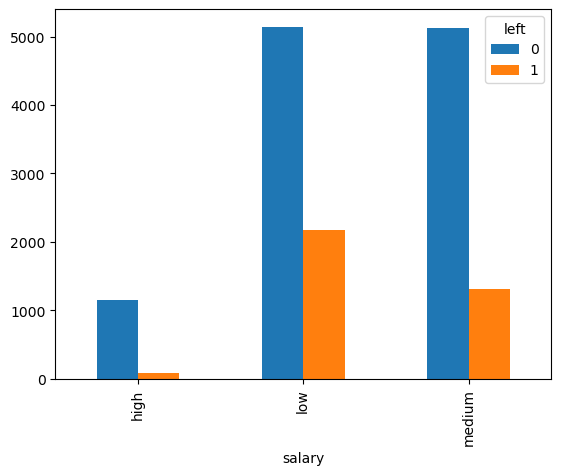

In [15]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

**Department wise employee retention rate**

<Axes: xlabel='Department'>

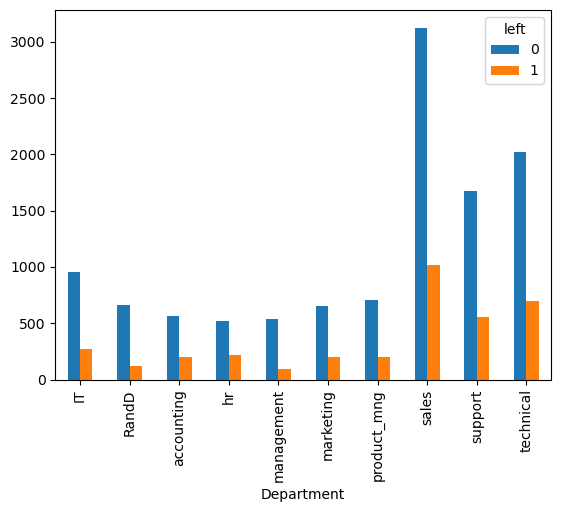

In [16]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

<h3 style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
</ol>

In [17]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [18]:
subdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   average_montly_hours   14999 non-null  int64  
 2   promotion_last_5years  14999 non-null  int64  
 3   salary                 14999 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 468.8+ KB


**Tackle salary dummy variable**

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check  one hot encoding tutorial to understand purpose behind dummy variables.

In [19]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [20]:
salary_dummies

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [21]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [22]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [23]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [24]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [25]:
y = df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42) 
# in stead of 42 one can use any number, if we dont pass random_state ,it will generate different sets of data every time
#

In [27]:
X_test.shape

(4500, 6)

In [28]:
# Do not use standard scalar as salary is 0 , 1 and 2 which is converted
# from category to continuous , hence if we convert it will be differnt meaning 


In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [30]:
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
model.predict_proba(X_test)

array([[0.83280707, 0.16719293],
       [0.89764285, 0.10235715],
       [0.78863313, 0.21136687],
       ...,
       [0.86011207, 0.13988793],
       [0.93356936, 0.06643064],
       [0.98207779, 0.01792221]])

In [32]:
y_test.head(10)

6723    0
6473    0
4679    0
862     1
7286    0
8127    0
3017    0
3087    0
6425    0
2250    0
Name: left, dtype: int64

In [33]:
pred_y=model.predict(X_test)
pred_y_df=pd.DataFrame(pred_y)
pred_y_df.head(13)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,1


**Accuracy of the model**

In [34]:
model.score(X_test,y_test)

0.7675555555555555

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_y_df))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3428
           1       0.53      0.24      0.33      1072

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.59      4500
weighted avg       0.73      0.77      0.73      4500



In [36]:
pred_y_df.shape

(4500, 1)

In [37]:
pred_y.shape

(4500,)

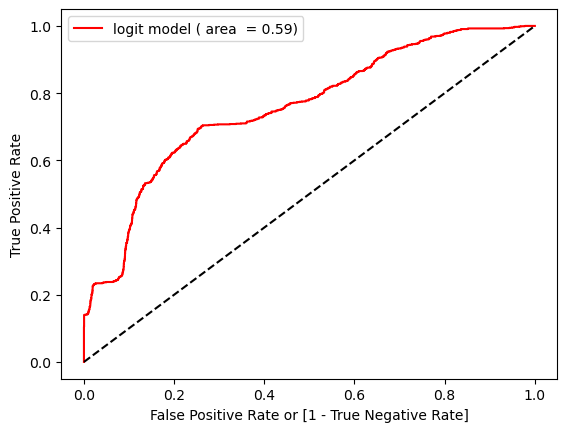

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba (X_test)[:,1])
# Y is the ground truth labels.
# classifier.predict_proba (X)[:,1] is the predicted probability
# of the positive class for each data point.

auc = roc_auc_score(y_test, pred_y)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()